In [1]:
!pip install nltk PyPDF2 py-readability-metrics wordcloud

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/lazybe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lazybe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lazybe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import PyPDF2

def extract_text(pdf_path):
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

fox_text = extract_text("foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")
reuters_text = extract_text("reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")

print(fox_text[:500])   # preview
print(reuters_text[:500])

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Emba
1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing R

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

fox_scores = sia.polarity_scores(fox_text)
reuters_scores = sia.polarity_scores(reuters_text)

print("Fox News Sentiment:", fox_scores)
print("Reuters Sentiment:", reuters_scores)

Fox News Sentiment: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Reuters Sentiment: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


In [9]:
from py_readability_metrics import Readability

fox_read = Readability(fox_text)
reuters_read = Readability(reuters_text)

print("Fox Readability:")
print("Flesch-Kincaid:", fox_read.flesch_kincaid_grade_level())
print("Gunning Fog:", fox_read.gunning_fog_index())
print("\nReuters Readability:")
print("Flesch-Kincaid:", reuters_read.flesch_kincaid_grade_level())
print("Gunning Fog:", reuters_read.gunning_fog_index())

ModuleNotFoundError: No module named 'py_readability_metrics'

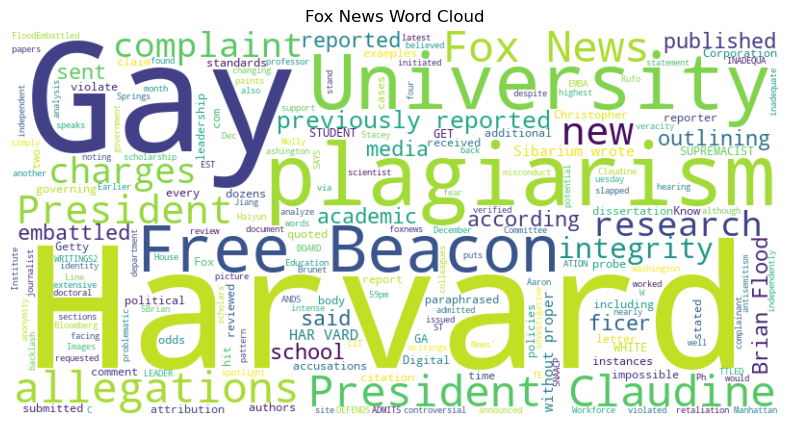

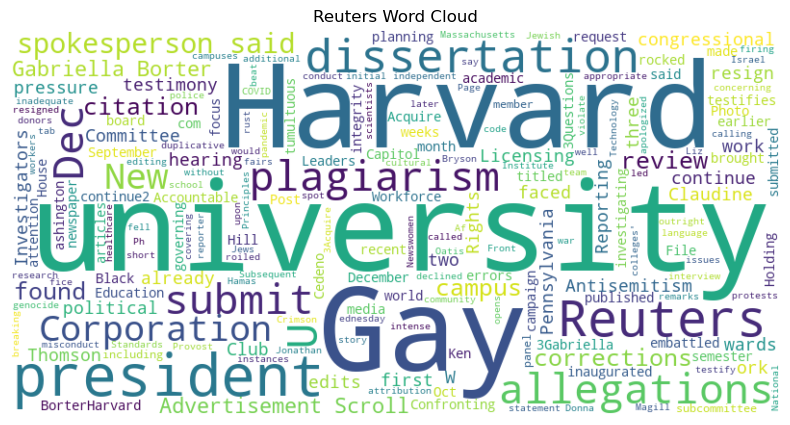

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=set(nltk.corpus.stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(fox_text, "Fox News Word Cloud")
plot_wordcloud(reuters_text, "Reuters Word Cloud")